# Data wrangling

## Importing the data

In [516]:
import pandas as pd

# Load the dataset into a dataframe
df = pd.read_csv("data/covid.csv");

# Print out the dataframe
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


## Creating columns

In [517]:
import numpy as np

# Make inconclusive results negative
df["CLASSIFICATION"] = 4 - df["CLASIFFICATION_FINAL"]

# Make negative results 0
df["CLASSIFICATION"] = np.where(df["CLASSIFICATION"] < 0, 0, df["CLASSIFICATION"])

# Mark deaths as severe
df["CLASSIFICATION"] = np.where(df["DATE_DIED"] == "9999-99-99", df["CLASSIFICATION"], 2)

# Condense classes down to 0, 1, and 2
df["CLASSIFICATION"] = np.where(df["CLASSIFICATION"] == 3, 2, df["CLASSIFICATION"])

The CLASIFFICATION_FINAL variable contains the findings of a covid-19 test. Because values above 3 mean that the patient
was not conclusively diagnosed with covid-19, we subtract the data from 4 so that these results become negative. We then
take these negative results and change them to a 0. If the patient's date of death is recorded as 9999-99-99, then that
means that the patient is not deceased. As such, every entry with a date gets recorded as a severe covid-19 case
(resulting in death). We then condense these degrees down to 3 degrees from 0 to 2 (mild to major).

## Dropping rows and columns

In [518]:
# Drop columns that contain information that is redundant or cannot be obtained before prognosticating
df.drop(["CLASIFFICATION_FINAL", "USMER", "PATIENT_TYPE", "MEDICAL_UNIT", "INTUBED", "ICU", "DATE_DIED"], axis=1, inplace=True)

## Cleaning the dataset

In [519]:
# Shift the SEX variable to a binary value
df["SEX"] = np.where(df["SEX"] == 1, 1, 0)

# Removes entries with unrealistic ages
df = df[(17 < df["AGE"]) & (df["AGE"] < 91)]

# Shift the PNEUMONIA variable to a binary value
df["PNEUMONIA"] = np.where(df["PNEUMONIA"] == 1, 1, 0)

# Cycle through the rest of the variables and convert them to binary values
for feature in df.columns[3:14]:
    # Shift this variable to a binary value
    print(sorted(df[feature].unique()))
    df[feature] = np.where(df[feature] == 1, 1, 0)

df

C:\Users\jmbreche\AppData\Local\Temp\ipykernel_2264\578743585.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PNEUMONIA"] = np.where(df["PNEUMONIA"] == 1, 1, 0)
C:\Users\jmbreche\AppData\Local\Temp\ipykernel_2264\578743585.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.where(df[feature] == 1, 1, 0)


[1, 2, 97, 98]
[1, 2, 98]
[1, 2, 98]
[1, 2, 98]
[1, 2, 98]
[1, 2, 98]
[1, 2, 98]
[1, 2, 98]
[1, 2, 98]
[1, 2, 98]
[1, 2, 98]


,SEX,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION
0,1,1,65,0,0,0,0,0,1,0,0,0,0,0,2
1,0,1,72,0,0,0,0,0,1,0,0,1,1,0,2
2,0,0,55,0,1,0,0,0,0,0,0,0,0,0,2
3,1,0,53,0,0,0,0,0,0,0,0,0,0,0,2
4,0,0,68,0,1,0,0,0,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0
1048571,0,0,51,0,0,0,0,0,1,0,0,0,0,0,0
1048572,0,0,55,0,0,0,0,0,0,0,0,0,0,0,0
1048573,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0


# Data analysis

## Training model

In [520]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Separate our explanatory and response variables
X = df.loc[:, "SEX":"TOBACCO"].values
y = df["CLASSIFICATION"].values

# Split our dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

# Fit our model to the training data
model = DecisionTreeClassifier().fit(X_train, y_train)

# Make predictions on the test data
pred = model.predict(X_test)
pred_prob = model.predict_proba(X_test)

## Confusion matrices

col_0       0     1     2
row_0                    
0      137738  5665  4046
1       69070  5991  4747
2        7847  3664  9095 

Accuracy: 0.616566409669858
Precision: 0.5499016791490665
Recall: 0.616566409669858
F1 Score: 0.5324051857674721


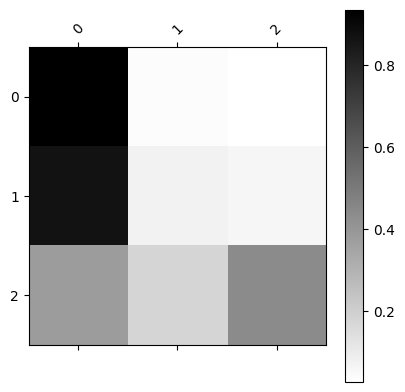

In [521]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Create a confusion matrix using pandas
conf_mat = pd.crosstab(y_test, pred)

# Print our confusion matrix
print(conf_mat, "\n")

# Print out our confusion matrix metrics
print("Accuracy:", metrics.accuracy_score(y_test, pred))
print("Precision:", metrics.precision_score(y_test, pred, average="weighted"))
print("Recall:", metrics.recall_score(y_test, pred, average="weighted"))
print("F1 Score:", metrics.f1_score(y_test, pred, average="weighted"))

# Normalize our confusion matrix
conf_mat_norm = conf_mat.div(conf_mat.sum(axis=1), axis=0)

# Visualize our confusion matrix
plt.matshow(conf_mat_norm, cmap=plt.cm.gray_r)
plt.colorbar()

# Set our tick marks accordingly
tick_marks = range(len(conf_mat_norm.columns))
plt.xticks(tick_marks, conf_mat_norm.columns, rotation=45)
plt.yticks(tick_marks, conf_mat_norm.index)

# Show our visualization
plt.show()

The model's precision and f1 score both hovered around the 50% mark. This means that our model performed fairly poorly,
but the model's accuracy and ability to distinguish severe cases indicates that the model does have a use case in
identifying outliers. Generally speaking, however, the model is not a great fit to the data.

## Analysis of ROC

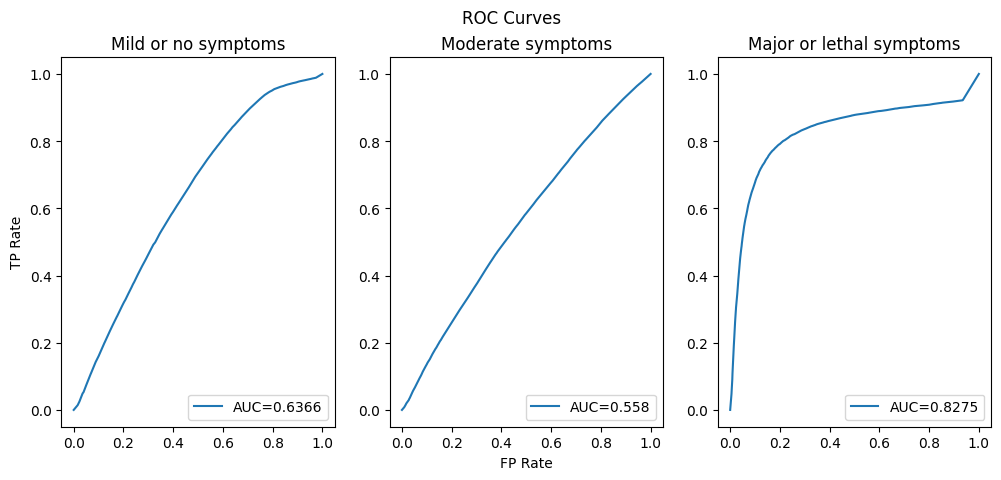

In [522]:
# Create a series of subplots for our ROC curves
fig, ax = plt.subplots(1, 3)

# Create a title for our figure
fig.suptitle("ROC Curves")

# Increase the width of our figure
fig.set_figwidth(12)

# Add axis labels in appropriate locations
ax[0].set_ylabel("TP Rate")
ax[1].set_xlabel("FP Rate")

# Add subplot titles for each degree of severity
ax[0].set_title("Mild or no symptoms")
ax[1].set_title("Moderate symptoms")
ax[2].set_title("Major or lethal symptoms")

# Loop through each class and plot its respective ROC curve
for i in range(len(conf_mat_norm.columns)):
    # Create a binary variable indicating whether this class was selected
    y_test_i = [1 if y == i else 0 for y in y_test]

    # Select the probabilities that the model assigned to this class
    pred_prob_i = [prob[i] for prob in pred_prob]

    # Calculate the metrics needed for our ROC curve
    fpr, tpr, _ = metrics.roc_curve(y_test_i, pred_prob_i)
    auc = round(metrics.roc_auc_score(y_test_i, pred_prob_i), 4)

    # Finally, plot our roc curve
    ax[i].plot(fpr, tpr, label="AUC="+str(auc))
    ax[i].legend(loc=4)

# Show our ROC curve subplots
plt.show()

We can see a slight bend in the mild or no symptoms ROC curve and the AUC score is .13 above .5. This means that our
model is moderately effective at identifying mild cases.

The moderate symptoms curve, however, is very linear and the AUC score is very close to .5. Our model is not good at
identifying moderate cases which is what we'd expect.

The major or lethal symptoms ROC curve is very bent. The AUC score is well above .8. Our model is pretty good at
identifying severe cases. There are just very few of these cases to identify.